# Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters)

Clustering can help us explore the dataset and separate cases into groups representing similar traits or characteristics. Each group could be a potential candidate for a class. Clustering is used for exploratory data analytics, rather than for confirmatory analytics or for predicting specific outcomes.

In this tutorial we are going to explore three common clustering algorithms.

## K-Means

K-means clustering is the most commonly used clustering algorithm. It's a centroid-based algorithm and the simplest unsupervised learning algorithm. This algorithm tries to minimize the variance of data points within a cluster. It's also how most people are introduced to unsupervised machine learning. K-means is best used on smaller data sets because it iterates over all of the data points. That means it'll take more time to classify data points if there are a large amount of them in the data set.

### Python implementation of K-Means

Let's get started with some simple examples! 

Firstly, generate a dataset of randomly generated blobs, which don't have any labels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


Now we plot these points, but without coloring the points using the labels:

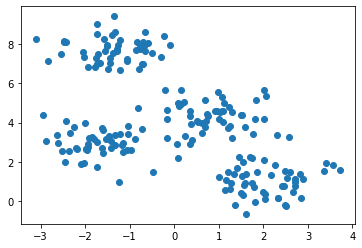

In [ ]:
plt.scatter(X[:,0],X[:,1]);

We can still discern four clusters in the data set. Let's see if the k-means algorithm can recover these clusters. The scikit-learn library has an implementation of the k-means algorithm, so we don't have to implenment the code by ourself. First we create the instance of the k-means model by giving it the number of clusters 4 as a hyperparameter.

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, n_init=10, max_iter=1000, algorithm='auto')
model.fit(X)
print(model.cluster_centers_)

[[ 0.86008475  4.31501411]
 [ 2.07464749  0.9869902 ]
 [-1.36512238  7.70188306]
 [-1.70639178  2.9104771 ]]


And plot points with some colours.

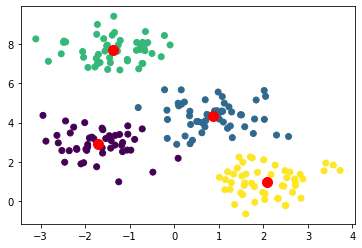

In [ ]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

For now, clustering looks more or less correct. To get a more quantitative measure of success we can get the accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.25


Oops! Even though the clusters could match almost perfectly to the original, their labels might be permuted. Let's select randomly one point from each cluster and check their labels from the original data labels. Then we use this label for the whole cluster. In essence, we are renaming the clusters, not re-clustering the data.

In [ ]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation
    
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[2, 1, 3, 0]


Now let's get the score again.

In [ ]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.99


This time the result looks great!

So, the k-means algorithm seems to work well in this case, but there can be several problems. 

Firstly, even though an Expectation–Maximization(EM) algorithm always converges, it might converge to a local maximum. To avoid this, EM type algorithms are usually run several times, each time starting from different random initial values. For instance, in the scikit-learn implementation, the algorithms is restarted by default 10 times.

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN is a popular density-based data clustering algorithm. To cluster data points, this algorithm separates the high-density regions of the data from the low-density areas. Unlike the K-Means algorithm, the best thing with this algorithm is that we don’t need to provide the number of clusters required prior.

DBSCAN algorithm group points based on distance measurement, usually the Euclidean distance and the minimum number of points. An essential property of this algorithm is that it helps us track down the outliers as the points in low-density regions; hence it is not sensitive to outliers as is the case of K-Means clustering.

### Python implementation of DBSCAN

Let's get started by importing some required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will use the [SOCR Body Density Data](https://wiki.socr.umich.edu/index.php/SOCR_Data_BMI_Regression) in this example. You can download the dataset with the link easily.

Now let's load the data.

In [2]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
if not os.path.exists('/content/BMI.csv'):
    link = '1_jBaXC32QcfGOHo2J5040PuEU7TAKj7Y'  # Restricted shared link
    downloaded = drive.CreateFile({'id':link}) 
    downloaded.GetContentFile('BMI.csv')

df = pd.read_csv('/content/BMI.csv')

df.head()

,UnderwaterDensity,BodyFatSiriEqu,Age,Height,Weight(kg),NeckCircumf,ChestCircumf,Abdomen2Circumf,HipCircumf,ThighCircumf,KneeCircumf,AnkleCircumf,ExtendBicepsCircumf,ForearmCircumf,WristCircumf
0,1.0708,12.3,23,172.085,69.96662,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,183.515,78.58488,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,168.275,69.85322,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,183.515,83.80119,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,180.975,83.57439,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Get the number of row and columnm as well as the column name of the data.

In [3]:
print(f'rows: {df.shape[0]}, columns: {df.shape[1]}')
print(df.columns.values.tolist())

rows: 252, columns: 15
['UnderwaterDensity', 'BodyFatSiriEqu', 'Age', 'Height', 'Weight(kg)', 'NeckCircumf', 'ChestCircumf', 'Abdomen2Circumf', 'HipCircumf', 'ThighCircumf', 'KneeCircumf', 'AnkleCircumf', 'ExtendBicepsCircumf', 'ForearmCircumf', 'WristCircumf']


To ensure randomisation we’ll create a random permutation of the number 0 to 252.

In [4]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

Let's do a simple check that if the data load successfully.

In [5]:
# Checking the shape of the dataset.
print("Dataset shape:", df.shape)

# Check if the dataset has any missing values.
df.isnull().any().any() 

Dataset shape: (252, 15)


False

The above output means there are no missing values in our dataset. Since our data is ready to use, let us extract the Age and the Weight columns and apply our DBSCAN model to them.

In [6]:
# extracting the above mentioned columns
x = df.loc[:, ['Age','Weight(kg)']].values
print(x.shape)

(252, 2)


Before we apply the DBSCAN model, first, we need to obtain its two parameters.

1. MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
  - If the dataset has two dimensions, use the min sample per cluster as 4.
  - If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension

  Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.

2. Epsilon (Eps): To calculate the value of *Eps*, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our *Eps*.

Next, compute data proximity from each other using Nearest Neighbours.

In [7]:
from sklearn.neighbors import NearestNeighbors

neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances


Sorting and plot the distances between the data points.

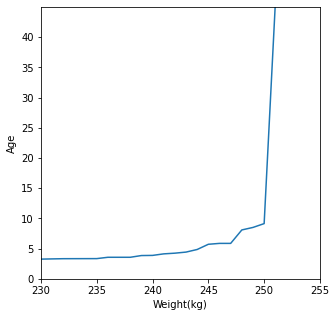

In [8]:
plt.rcParams['figure.figsize'] = (5,5) # setting the figure size
plt.plot(distances) 
plt.xlim((230, 255))     
plt.ylim((0, 45)) 
my_x_ticks = np.arange(230, 260, 5)
my_y_ticks = np.arange(0, 45, 5)
plt.xlabel("Weight(kg)") 
plt.ylabel("Age") 
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.show()

From the above plot, we note the maximum curvature of the curve is about four, and thus we picked our Eps as 4.

We now have our two parameters as:

- MinPoints = 4
- Eps = 4

Now that we have the parameters let us implement the DBSCAN model.

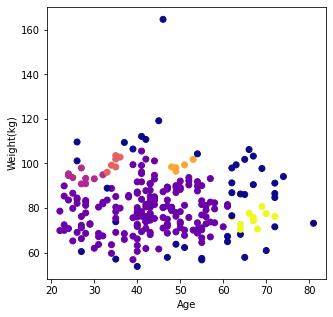

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 4, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") 
plt.xlabel("Age") 
plt.ylabel("Weight(kg)") 
plt.show() 

## Hierarchical Clustering

Hierarchical-based clustering is typically used on hierarchical data, like you would get from a company database or taxonomies. It builds a tree of clusters so everything is organized from the top-down. This is more restrictive than the other clustering types, but it's perfect for specific kinds of data sets.

There are two types of hierarchical clustering algorithms:

- Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.

- Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this section, we will be looking at Agglomerative clustering.

### Python implementation of Hierarchical Clustering

As usual, let's get started by importing some required libraries.

In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.datasets import make_blobs 
import pylab
%matplotlib inline

Let's start with a simple example. We will be generating a set of data using the make_blobs class.

In [ ]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data

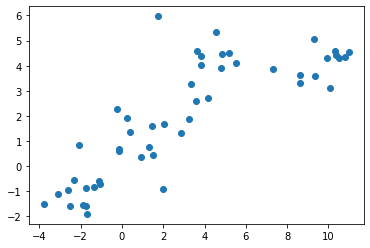

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

We will start by clustering the random data points we just created.

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

Fit the model with X2 and y2 from the generated data above.

In [ ]:
result_y = agglom.fit(X1) # y1 is optional, won't be counted in the calculation


All done! Easy, Right? Let's plot the points.

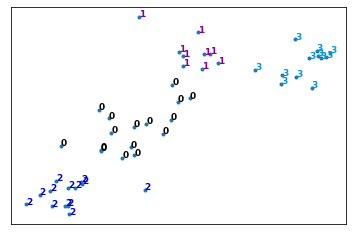

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(result_y.labels_[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()
plt.close()

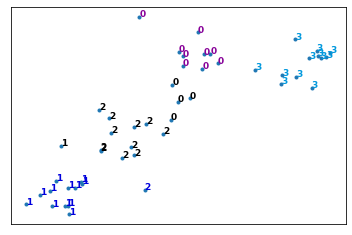

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()
plt.close()

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

Next, we will save the dendrogram to a variable called dendro. In doing this, the dendrogram will also be displayed. Using the dendrogram class from hierarchy, pass in the parameter:

[[0.         0.46366567 0.1725936  ... 0.26681818 0.81024201 0.42175037]
 [0.46366567 0.         0.29715279 ... 0.49295995 1.09061833 0.05082744]
 [0.1725936  0.29715279 0.         ... 0.2573035  0.86528749 0.25227891]
 ...
 [0.26681818 0.49295995 0.2573035  ... 0.         0.61144674 0.44213405]
 [0.81024201 1.09061833 0.86528749 ... 0.61144674 0.         1.04054975]
 [0.42175037 0.05082744 0.25227891 ... 0.44213405 1.04054975 0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


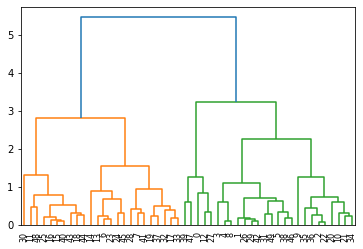

In [ ]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

Okay, the warm-up is over, now let's try hierarchical clustering on the real dataset.

We will use the [SOCR Body Density Data](https://wiki.socr.umich.edu/index.php/SOCR_Data_BMI_Regression) again.

Firstly, load the data.

In [ ]:
!pip install -U -q PyDrive
import os
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
if not os.path.exists('/content/BMI.csv'):
    link = '1QK9ZYQxbPGhhAjoj5IQNxglY9j3wtZVb'  # Restricted shared link
    downloaded = drive.CreateFile({'id':link}) 
    downloaded.GetContentFile('BMI.csv')

df = pd.read_csv('/content/BMI.csv')
df.head()

,UnderwaterDensity,BodyFatSiriEqu,Age,Height,Weight(kg),NeckCircumf,ChestCircumf,Abdomen2Circumf,HipCircumf,ThighCircumf,KneeCircumf,AnkleCircumf,ExtendBicepsCircumf,ForearmCircumf,WristCircumf
0,1.0708,12.3,23,172.085,69.96662,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,183.515,78.58488,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,168.275,69.85322,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,183.515,83.80119,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,180.975,83.57439,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Lets select our feature set:


In [ ]:
featureset = df[[ 'UnderwaterDensity', 'UnderwaterDensity', 'Age', 'Height', 'Weight(kg)',
       'NeckCircumf', 'ChestCircumf', 'Abdomen2Circumf', 'HipCircumf', 'ThighCircumf', 'KneeCircumf',
       'AnkleCircumf', 'ExtendBicepsCircumf']]

Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.66549605, 0.66549605, 0.01694915, 0.79274611, 0.14612702,
        0.25373134, 0.24253076, 0.20076239, 0.15151515, 0.29426434,
        0.26708075, 0.18918919, 0.35643564],
       [0.7928007 , 0.7928007 , 0.        , 0.88601036, 0.22378901,
        0.3681592 , 0.2513181 , 0.17280813, 0.2185008 , 0.28678304,
        0.26708075, 0.29054054, 0.28217822],
       [0.40737489, 0.40737489, 0.        , 0.76165803, 0.14510514,
        0.14427861, 0.28998243, 0.23506989, 0.22647528, 0.30922693,
        0.36645963, 0.33108108, 0.1980198 ],
       [0.70324846, 0.70324846, 0.06779661, 0.88601036, 0.27079491,
        0.31343284, 0.39543058, 0.21601017, 0.25837321, 0.32169576,
        0.26708075, 0.25      , 0.37623762],
       [0.34240562, 0.34240562, 0.03389831, 0.86528497, 0.26875114,
        0.1641791 , 0.31634446, 0.3888183 , 0.26953748, 0.39900249,
        0.57142857, 0.33108108, 0.36633663]])

And calculate the distance matrix.

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.28585229 0.4591997  ... 1.0850267  1.04011519 1.23274621]
 [0.28585229 0.         0.62723552 ... 1.18784773 1.11440159 1.30017988]
 [0.4591997  0.62723552 0.         ... 1.01232938 0.9679956  1.11744504]
 ...
 [1.0850267  1.18784773 1.01232938 ... 0.         0.36166089 0.43565016]
 [1.04011519 1.11440159 0.9679956  ... 0.36166089 0.         0.35417183]
 [1.23274621 1.30017988 1.11744504 ... 0.43565016 0.35417183 0.        ]]


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. 

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 4, 2, 2, 5, 2, 2, 0, 1, 1, 4, 4, 3, 1, 1, 1, 1, 4,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       2, 4, 4, 4, 2, 4, 2, 0, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2,
       0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 4, 0, 1, 4, 2, 2, 4, 4, 1, 2,
       4, 1, 4, 0, 1, 2, 2, 4, 4, 2, 1, 4, 0, 4, 2, 1, 0, 0, 4, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 1, 0, 4, 4, 2, 4, 2, 1, 4, 4, 4, 1, 4, 2, 4, 4,
       4, 1, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 2, 1,
       1, 1, 4, 4, 1, 2, 1, 4, 4, 1])

And, we can add a new field to our dataframe to show the cluster of each row:

In [ ]:
df['cluster_'] = agglom.labels_
df['Weight'] = df['Weight(kg)']
df.head()

,UnderwaterDensity,BodyFatSiriEqu,Age,Height,Weight(kg),NeckCircumf,ChestCircumf,Abdomen2Circumf,HipCircumf,ThighCircumf,KneeCircumf,AnkleCircumf,ExtendBicepsCircumf,ForearmCircumf,WristCircumf,cluster_,Weight
0,1.0708,12.3,23,172.085,69.96662,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,2,69.96662
1,1.0853,6.1,22,183.515,78.58488,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,2,78.58488
2,1.0414,25.3,22,168.275,69.85322,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0,69.85322
3,1.0751,10.4,26,183.515,83.80119,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,2,83.80119
4,1.0340,28.7,24,180.975,83.57439,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0,83.57439


Now plot the chart.

Text(0, 0.5, 'Weight')

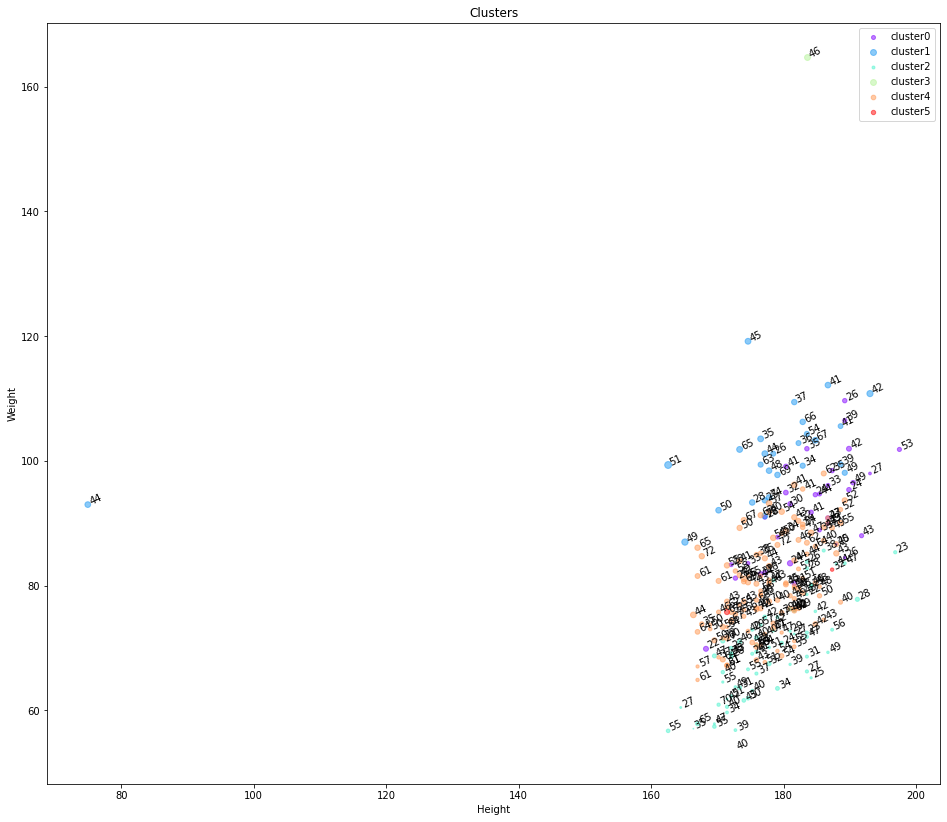

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Height[i], subset.Weight[i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset.Height, subset.Weight, s= subset.BodyFatSiriEqu, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Height')
plt.ylabel('Weight')

Let's visualize the clustering as a dendrogram.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


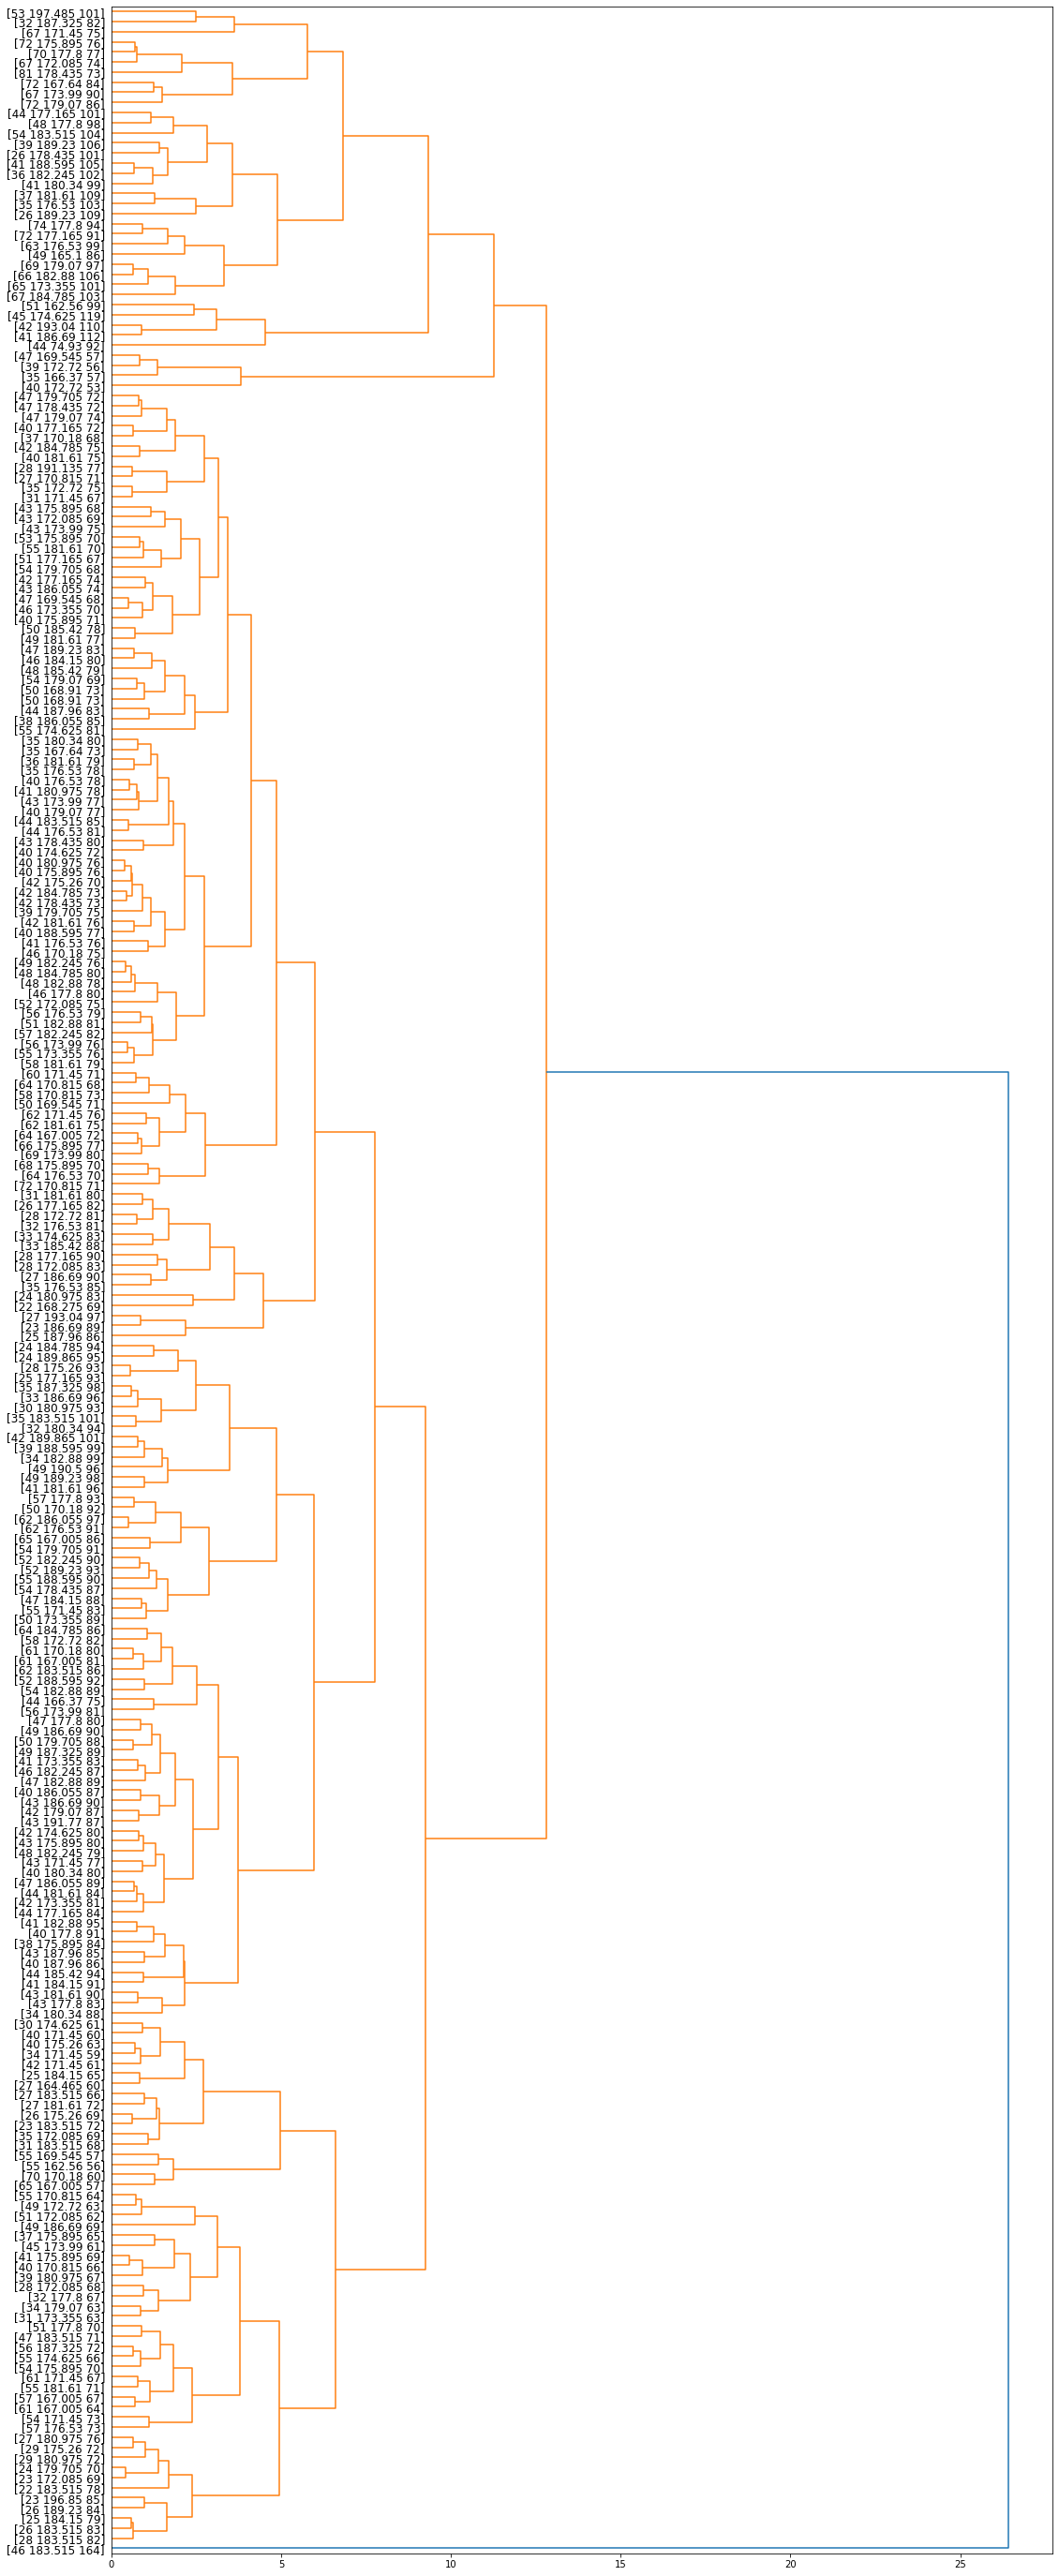

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Height'][id], int(float(df['Weight(kg)'][id])) )
    
dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')


## Practice Questions

### 1. The Limit of K-Means

Copy and paste the following code fragment into the first code cell, and comment out the line of 'make_blobs', then run the code. Does K-Means still work well? Why does this happen?

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

### 2. Find The Accurate Epsilon

In DBSCAN, try different values of Epsilon and see how the plot changes. It is a bit too rough to determine the value of Epsilon from the graph alone, what is the way to get the exact Epsilon, i.e. the maximum value at the curvature of the graph？

### 3. The Choice of Linkage

In Hierarchical Clustering, we used complete linkage for our case, change it to average linkage to see how the dendogram changes.